In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from glob import glob
import matplotlib.pyplot as plt
import scipy.io as sio
import matplotlib.gridspec as gridspec
#import SeabornFig2Grid as sfg
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


# Tactile Distance - Bias Analysis

To examine whether Thumb usage would lead to incorporating it into the body representation, we tested participants’ ability to discriminate between tactile distances applied over their wrist and forearm. During the experiment, participants were seated in an armchair, with their right elbow rested on an elevated foam padding with the forearm at full flexion and their left hand placed on a mouse connected to the experimental computer. The tactile stimuli comprised of custom-made callipers with acrylic pins fixed at distances of 50, 60 and 70 mm. In each trial, two distances were presented sequentially – one over the marked basepoint of the Thumb, one over the midpoint of the ventral side of the forearm (both in the same orientation). Participants were instructed to indicate which of the distances they perceived as larger. Here we perform a simple analysis of bias, to see if Third Thumnb training increases the bias towards judging the distance over the wrist as larger.


In [2]:
subjects = list(range(1,9)) + list(range(11,18)) + list([19]) + list(range(21,24))
subjects

[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23]

In [3]:
path = '/Volumes/ritd-ag-project-rd00k9-tmaki67/'
allBias = pd.DataFrame()
subjNum = len(subjects)
for subj in subjects:
    print('SF' + str(subj))
    
    # Familiarization
    try:
        tempFam = sio.loadmat(path + 'SF' + str(subj) + '/Familiarisation/Tactile Distance/SF' + str(subj) + '-fam-TD.mat', variable_names=['resp'])
    except:
        tempFam['resp'] = 999 
        
    # Pre
    tempPre = sio.loadmat(path + 'SF' + str(subj) + '/Pre/Tactile Distance/SF' + str(subj) + '-pre-TD.mat', variable_names=['resp'])
    # replace invalid answers (as per logbook) with 99
    if subj == 5:
        tempPre['resp'][14][0] = 99
        tempPre['resp'][6][2] = 99
    elif subj == 7:
        tempPre['resp'][17][2] = 99
    elif subj == 8:
        tempPre['resp'][0][0] = 99
        tempPre['resp'][6][1] = 99
    elif subj == 12:
        tempPre['resp'][0][0] = 99 
        
    # Post
    tempPost = sio.loadmat(path + 'SF' + str(subj) + '/Post/Tactile Distance/SF' + str(subj) + '-post-TD.mat', variable_names=['resp'])
    if subj == 17:
        tempPost['resp'][0][0] = 99
        tempPost['resp'][2][0] = 99
        tempPost['resp'][7][2] = 99
    
    allBias = allBias.append([[subj, sum(tempFam['resp']), sum(tempPre['resp'][np.where(tempPre['resp']<2)]),
                             sum(tempPost['resp'][np.where(tempPost['resp']<2)])]])

allBias.columns = ['SUBJ','FAM','PRE','POST']
allBias = allBias.set_index('SUBJ')

SF1
SF2
SF3
SF4
SF5
SF6
SF7
SF8
SF11
SF12
SF13
SF14
SF15
SF16
SF17
SF19
SF21
SF22
SF23


In [4]:
allBias.is_copy = False
allBias['FAM'] = (35 - allBias['FAM']) / 35

for subj in subjects:
    if subj == 5:
        allBias.loc[allBias.index==subj,'PRE'] = (103-allBias[allBias.index==subj]['PRE'])/103
        allBias.loc[allBias.index==subj,'POST'] = (105-allBias[allBias.index==subj]['POST'])/105
    elif subj == 7:
        allBias.loc[allBias.index==subj,'PRE'] = (104-allBias[allBias.index==subj]['PRE'])/104
        allBias.loc[allBias.index==subj,'POST'] = (105-allBias[allBias.index==subj]['POST'])/105
    elif subj == 8:
        allBias.loc[allBias.index==subj,'PRE'] = (103-allBias[allBias.index==subj]['PRE'])/103
        allBias.loc[allBias.index==subj,'POST'] = (105-allBias[allBias.index==subj]['POST'])/105
    elif subj == 12:
        allBias.loc[allBias.index==subj,'PRE'] = (104-allBias[allBias.index==subj]['PRE'])/104
        allBias.loc[allBias.index==subj,'POST'] = (105-allBias[allBias.index==subj]['POST'])/105
    elif subj == 17:
        allBias.loc[allBias.index==subj,'PRE'] = (105-allBias[allBias.index==subj]['PRE'])/105
        allBias.loc[allBias.index==subj,'POST'] = (102-allBias[allBias.index==subj]['POST'])/102
    else:
        allBias.loc[allBias.index==subj,'PRE'] = (105-allBias[allBias.index==subj]['PRE'])/105
        allBias.loc[allBias.index==subj,'POST'] = (105-allBias[allBias.index==subj]['POST'])/105

for i in range(0,subjNum):
    if allBias.iloc[i,0] < 0:
        allBias.iloc[i,0] = NaN
allBias = allBias.drop(allBias.index[14])

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


In [8]:
allBias.mean()

FAM     0.587755
PRE     0.589262
POST    0.608466
dtype: float64

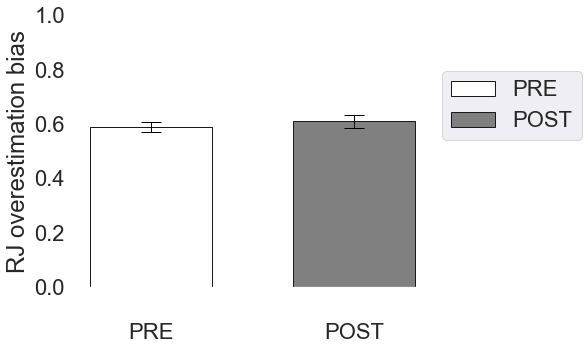

In [9]:
sns.set(font_scale = 2)
width = 0.15 
error_kw = {'capsize': 10, 'capthick': 1, 'ecolor': 'black','linewidth': 1}
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(8,5))

plt.bar(0.8, allBias['PRE'].mean(), width, alpha=1, color='white', edgecolor='k', linewidth=1, yerr=np.array([0,allBias['PRE'].std()/sqrt(len(allBias))])[1], error_kw=error_kw) 
plt.bar(1.05, allBias['POST'].mean(), width, alpha=1, color='grey', edgecolor='k', linewidth=1, yerr=np.array([0,allBias['POST'].std()/sqrt(len(allBias))])[1], error_kw=error_kw) 

# Set the y axis label
ax.set_ylabel('RJ overestimation bias')

# Set the position of the x ticks
ax.set_xticks([0.8, 1.05])

# Set the labels for the x ticks
ax.set_xticklabels(["PRE","POST"])
ax.tick_params(axis='x', pad=30)

# Add gridline
#ax.grid(color='k', linestyle='--', linewidth=0.5, axis ='y', which="both")
ax.set_facecolor('xkcd:white')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ylim((0,1))   # set the ylim to bottom, top

# Put a legend to the right of the current axis
ax.legend(['PRE','POST'], loc='lower left', bbox_to_anchor=(1,0.5))
    
plt.show()

In [10]:
stats.wilcoxon(allBias['PRE'], y=allBias['POST'], zero_method='wilcox', correction=False)

WilcoxonResult(statistic=55.5, pvalue=0.31969916264429943)

In [12]:
allBias['POST-PRE'] = allBias['POST'] - allBias['PRE']
melted = pd.melt(allBias.reset_index(), id_vars=["SUBJ"], var_name="SESSION", value_name="BIAS")

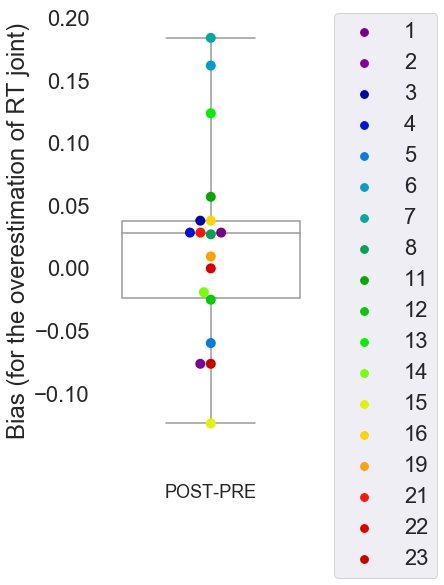

In [13]:
fig, ax = plt.subplots(figsize=(4,8))
ax = sns.boxplot(x="SESSION", y="BIAS", data=melted[melted['SESSION'] == 'POST-PRE'], whis=np.inf, color='white')
ax = sns.swarmplot(x="SESSION", y="BIAS", hue="SUBJ", data=melted[melted['SESSION'] == 'POST-PRE'], size=10, palette='nipy_spectral')
ax.set_ylabel('Bias (for the overestimation of RT joint)')
ax.set_xlabel('')
ax.tick_params(axis='x',pad=30,labelsize=18)
ax.set(facecolor='white')
ax.axvline(-0.5, color="black", zorder=0, linestyle='solid')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()